Facebook is one of the biggest social media platforms in the world, with around 3 billion monthly active users as of 2024. Each user on Facebook belongs to a complex social network that can be analyzed by looking into a user's friends and expanding that network. In doing so, an “ego network” can be created, which essentially means a social network that has connections to one individual. Specifically, a Facebook ego network is created by capturing the connections between an individual’s friends and their friends, while excluding the original individual who is the focus of the network.

In 2012, researchers at Stanford then developed a dataset from Facebook data that contains 10 different ego networks along with features that each individual had. A feature of an individual can be described as some personal information about an individual that can contain things like education, political affiliation, location, and more. By analyzing this data, we were able to gain crucial understanding of dynamics in social media networks, which can give us insights on how personal features affect one’s chances of being in a network, how these networks are structured, and the factors that play into a social network’s formation.

This analysis is important for gaining a deeper understanding of social media and the influence of personal factors on one’s social circle. Specifically, we used the ego network data to build visualizations of these networks, apply mathematical methods to form distinct communities within these networks, and used our findings to analyze what features can be best used to examine how social networks are formed. These insights can then have applications in many different fields ranging from marketing, community building, and the development of other social media platforms.

C:\Users\david\AppData\Local\Temp\ipykernel_25196\677082555.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', num_communities)


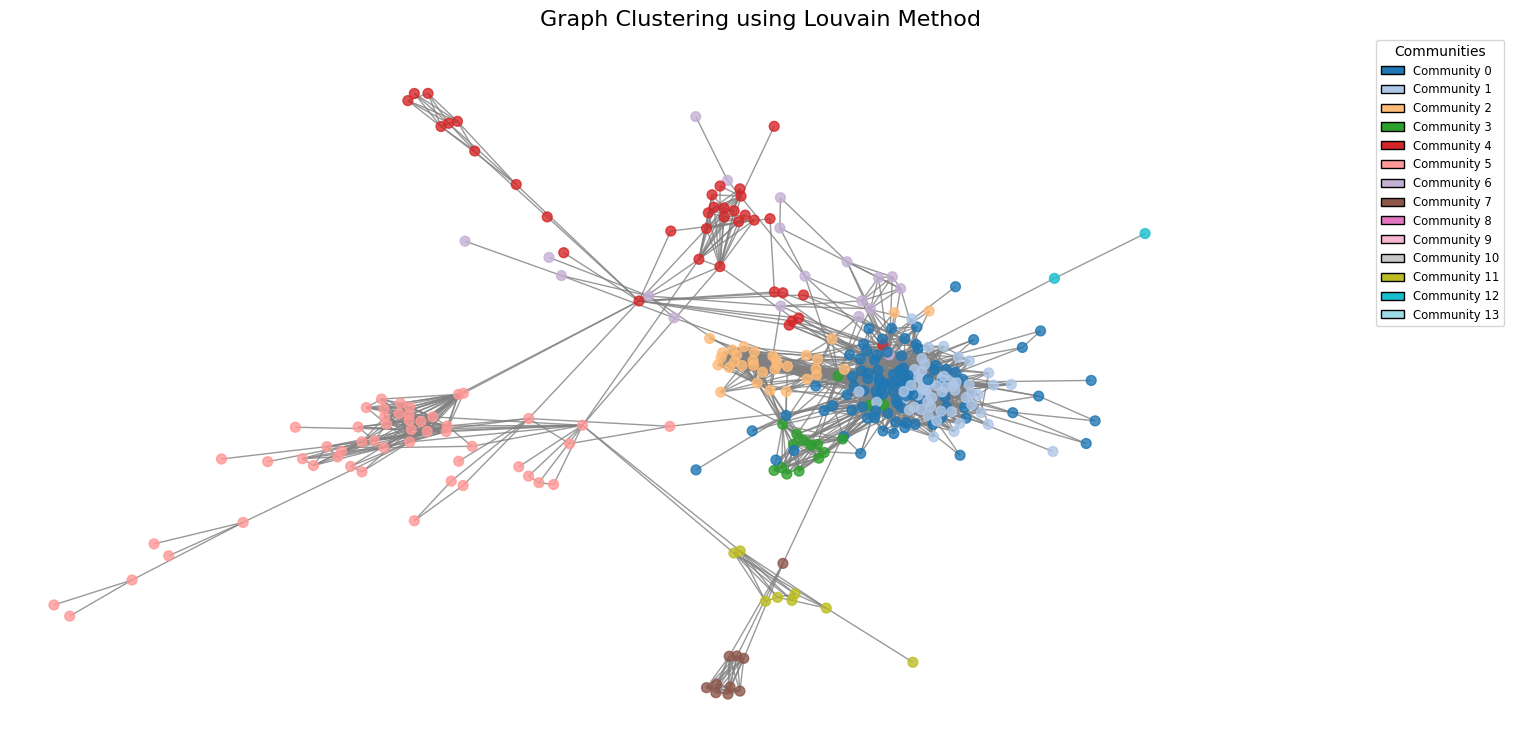

In [59]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import matplotlib.cm as cm
%matplotlib inline

feat_file = 'data/0.feat'
circles_file = 'data/0.circles'
edges_file = 'data/0.edges'
egofeat_file = 'data/0.egofeat'

feat_df = pd.read_csv(feat_file, sep=" ", header=None)
circles_df = pd.read_csv(circles_file, sep=" ", header=None)
edges_df = pd.read_csv(edges_file, sep=" ", header=None)
egofeat_df = pd.read_csv(egofeat_file, sep=" ", header=None)

G = nx.Graph()
G.add_edges_from(edges_df.values)

# apply louvain
partition = community_louvain.best_partition(G)
num_communities = len(set(partition.values()))

# create a communities dict to keep track of them
communities = defaultdict(list)
for node, community_id in partition.items():
    communities[community_id].append(node)

#find the most representative features
most_representative_features = {}
for community_id, nodes in communities.items():
    # extract the feature vectors for nodes in this community
    node_indices = [feat_df[0].tolist().index(node) for node in nodes if node in feat_df[0].tolist()]
    community_features = feat_df.iloc[node_indices, 1:]  # exclude the node ID column

    # calculate the average value of each feature within the community
    if not community_features.empty:
        most_representative_features[community_id] = community_features.mean(axis=0)

# convert to df
representative_features_df = pd.DataFrame({
    f"Community_{community_id}": features for community_id, features in most_representative_features.items()
}).T



# assign colors (tab20 do ensure there are enough unique colors for each community)
color_map = cm.get_cmap('tab20', num_communities)
colors = [color_map(i) for i in range(num_communities)] 
node_colors = [colors[partition[node]] for node in G.nodes()]

# draw the graph with community coloring
legend_elements = [
    Patch(facecolor=colors[i % len(colors)], edgecolor='black', label=f'Community {i}')
    for i in range(num_communities)
]

plt.figure(figsize=(15,7))
pos = pos = nx.spring_layout(G,seed=42)
nx.draw(
    G,
    pos,
    node_color=node_colors,
    node_size=50,
    edge_color="gray",
    with_labels=False,
    alpha=0.8
)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.4, 0.4)
plt.legend(
    handles=legend_elements,
    title="Communities",
    loc="upper right",
    fontsize='small'
)

plt.title("Graph Clustering using Louvain Method", fontsize=16)
plt.show()


This visualization displays one of the ten ego networks (specifically, ego network 0), with its communities being distinguished by unique colors. By displaying the relationships in this ego network, the graph provides a representation of how communities are separated and formed. Specifically, the separation of communities help display the natural separations between subgroups within a social network and could imply that individuals with shared features tend to gravitate towards one another. The visualization also displays how communities are formed. Within each community, there are a number of nodes that are densely connected with one another, while also being lightly connected with other communities as well. For example, Community 7 contains a collection of individuals that have deep and shared connections with one another, but has one individual in the middle that has a connection with the rest of the nodes in the large cluster in the middle. Additionally, since there is a cluster of communities in the middle that are also densely connected with one another, this would imply that these communities may share overlapping features or relationships. This dense cluster could suggest that these groups also have shared features such as mutual friends, similar interests, or geographic proximity. However, this visualization does not factor in each individual’s features when classifying their communities.

![Interactive Network Graph](interactive_graph.png)

https://observablehq.com/d/a3d7f183ecb4c5e4

To better understand the structure of ego networks, we took a closer look at the distinct communities that form when grouping each individual based on their shared features like ‘education’ and ‘location’. This approach allowed us to uncover some interesting patterns in how people closer and interact within these networks.

When we mapped these features into the network, we found that highly relevant features like ‘work’ and ‘location’ tended to group towards the center of the network, forming tight-knit groups. On the other hand, features like ‘last_name’ were often found barely connected or not connected to the center at all, suggesting that they have a less significant role in the formation of these connections. However, one interesting result from this visualization that we observed was that there was no single community within the network that consisted of individuals with the same shared features. For example, ‘work’ and ‘education’ may group closely together since they are typically significant factors in the formation of social connections, but we found that they are often interconnected with other categories like ‘location’ and ‘hometown’. This would suggest that while shared attributes and features draw people closer, real-world relationships are more complex and have many other factors that come into play.

To better visualize the network, we created an interactive visualization with a checkbox to allow viewers to filter by the connecting features. In this tool, one can explore the connections by pulling nodes away and observing what types of connections they may have with one another. Additionally, they can see the connections of only a few features by checking specific boxes located in the legend. This dynamic representation of our network displays the complexity of the social connections we create and how certain features may be related to one another.

In [60]:
from collections import defaultdict
import pandas as pd
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.colors as mcolors
from lets_plot import *
LetsPlot.setup_html()

feat_file = 'data/0.feat'
circles_file = 'data/0.circles'
edges_file = 'data/0.edges'
egofeat_file = 'data/0.egofeat'
featnames_file = f'data/0.featnames'

feat_df = pd.read_csv(feat_file, sep=" ", header=None)
circles_df = pd.read_csv(circles_file, sep=" ", header=None)
edges_df = pd.read_csv(edges_file, sep=" ", header=None)
egofeat_df = pd.read_csv(egofeat_file, sep=" ", header=None)
featnames_df = pd.read_csv(
    featnames_file,
    sep=" ",
    header=None,
    names=["ID", "Description"],
    usecols=[0, 1],
    engine="python",
)
featnames_df["Description"] = featnames_df["Description"].str.replace(";anonymized", "", regex=False)

G = nx.Graph()
G.add_edges_from(edges_df.values)

# apply louvain
partition = community_louvain.best_partition(G)
num_communities = len(set(partition.values()))

# create a communities dict to keep track of them
communities = defaultdict(list)
for node, community_id in partition.items():
    communities[community_id].append(node)

#find the most representative features
feature_matrix_per_community = {}
for community_id, nodes in communities.items():
    # extract the feature vectors for nodes in this community
    node_indices = [feat_df[0].tolist().index(node) for node in nodes if node in feat_df[0].tolist()]
    community_features = feat_df.iloc[node_indices, 1:]  # exclude the node ID column

    # calculate the average value of each feature within the community
    if not community_features.empty:
        feature_matrix_per_community[community_id] = community_features.mean(axis=0)

# convert to df and make it usable in heatmap
feature_matrix_df = pd.DataFrame.from_dict(feature_matrix_per_community, orient='index')
feature_matrix_df.index.name = "Community"
feature_matrix_df.columns = [f"Feature_{i}" for i in range(1, feature_matrix_df.shape[1] + 1)]

# find the top 10 most common features
top_10_features = feature_matrix_df.mean(axis=0).nlargest(10).index
top_features_data = feature_matrix_df[top_10_features]

feature_matrix_df = top_features_data.copy()
top_feature_index = feature_matrix_df.mean(axis=0).nlargest(10)

# extract the numeric part of the feature names
features = [int(feature.split("_")[1]) for feature in top_feature_index.index]

# map the feature indices to names
featnames = [
    featnames_df.loc[feat, "Description"] if feat in featnames_df["ID"].values else None
    for feat in features
]

# replace column names in the df with corrected feature names
feature_matrix_df.columns = featnames

top_features_named_long = (
    feature_matrix_df.reset_index()
    .melt(id_vars=["Community"], var_name="Feature", value_name="Value")
)

# plot the heatmap
top_features_named_heatmap = (
    ggplot(top_features_named_long, aes(x="Feature", y="Community", fill="Value"))
    + geom_tile(color="white")
    + scale_fill_gradient(low="blue", high="red")
    + theme_minimal()
    + labs(
        title="Top 10 Common Features Across Communities",
        x="Features",
        y="Communities",
        fill="Feature Value"
    )
    + theme(
        axis_text_x=element_text(angle=90, hjust=1, vjust=1, size=10),
        axis_text_y=element_text(size=10),
        plot_title=element_text(size=14)
    )+ ggsize(1000, 800)
    
)
top_features_named_heatmap.show()

As our next step in our analysis, we decided to compare what features are common within a community, by calculating the average occurrence of these features for each community. We also decided to focus on the communities derived from the first visualization to see what features are most common in distinct, more connected communities. However, since there were 224 unique features in ego network 0, we then took the top ten average feature values across all communities to create an easily interpretable visualization. From this, when including that data in a heatmap, we created the visualization shown above. This heatmap displays that other than Community 10, all communities had high shared values of ‘location;id’. Since features in the data are anonymized to preserve user privacy, it is unknown exactly what this location this feature represents. This illustrates that an individual’s geographic location can be a good indicator to predict whether they belong within this specific ego network. Furthermore, from this data, it could imply that this ego network could have been formed from an individual that is part of a tightly knit neighborhood or city, where its residents are closely connected due to their shared geographic proximity. The high shared values of ‘Feature_128’ across most communities suggest that location plays a crucial role in shaping the structure and individuals of this ego network, reinforcing the idea that people in close proximity to one another are more likely to form social connections. However, this data is specific to Ego Network 0 and in order to uncover patterns across all social networks, we applied the same process to all ten ego networks and combined the results, resulting in the following visualization.

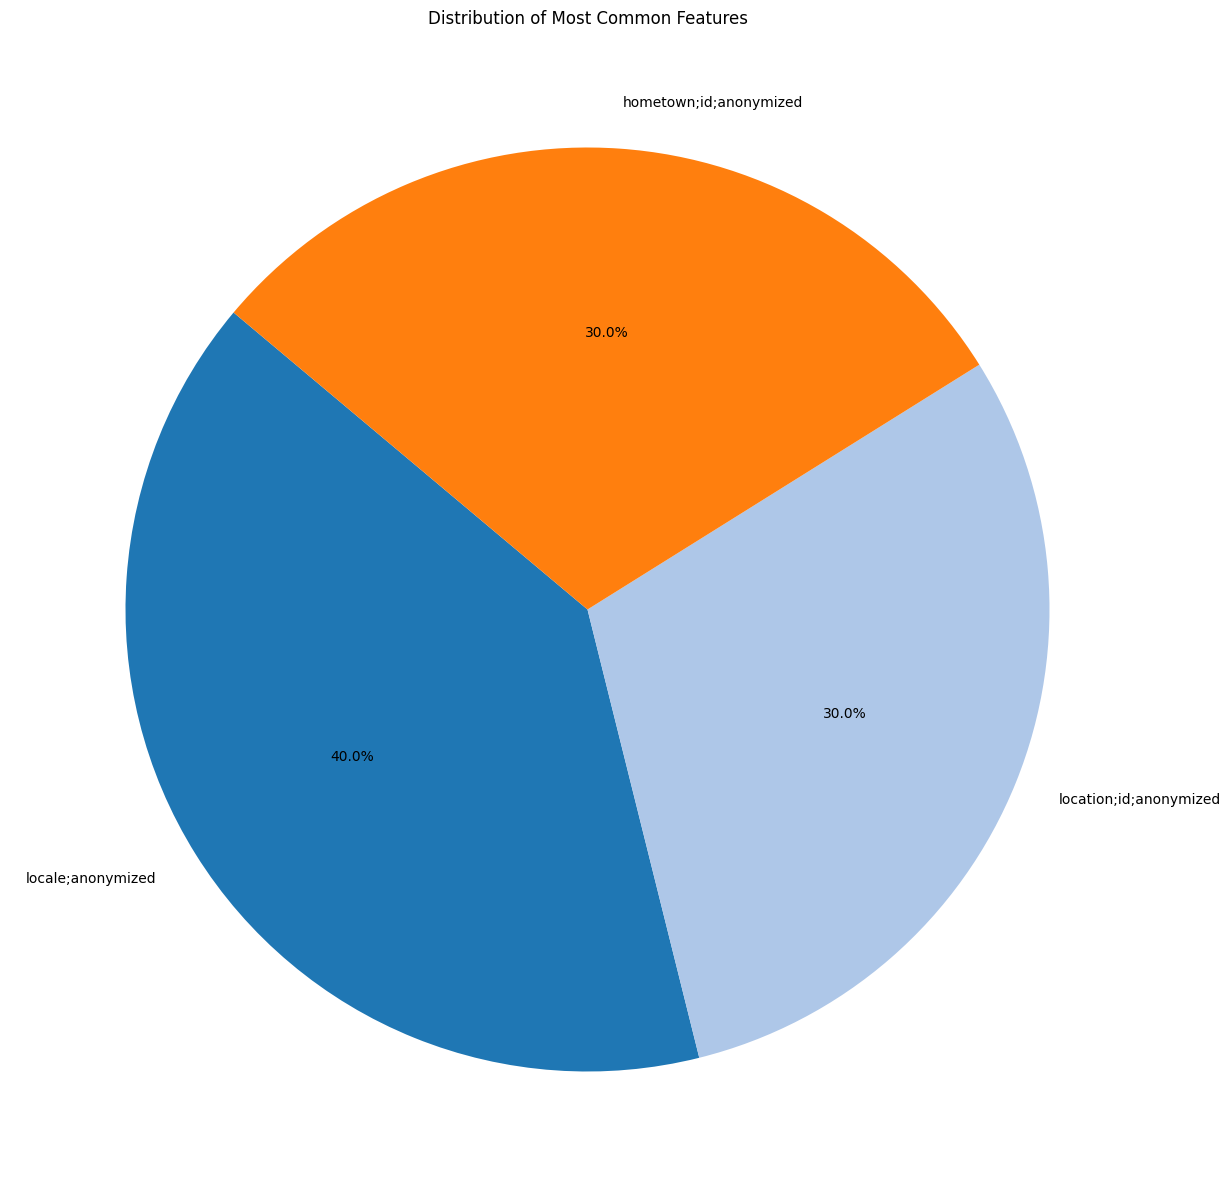

In [73]:
from collections import defaultdict
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import networkx as nx
import community.community_louvain as community_louvain
from lets_plot import *
import os
import matplotlib.pyplot as plt


folder_path = "data"

# list all files in the folder ending with .feat
feat_files = [file for file in os.listdir(folder_path) if file.endswith(".feat")]

most_common_features = {}
for file in feat_files:
    name = os.path.splitext(file)[0]
    
    feat_file = f'data/{name}.feat'
    circles_file = f'data/{name}.circles'
    edges_file = f'data/{name}.edges'
    egofeat_file = f'data/{name}.egofeat'
    featnames_file = f'data/{name}.featnames'

    feat_df = pd.read_csv(feat_file, sep=" ", header=None)
    circles_df = pd.read_csv(circles_file, sep=" ", header=None)
    edges_df = pd.read_csv(edges_file, sep=" ", header=None)
    egofeat_df = pd.read_csv(egofeat_file, sep=" ", header=None)
    featnames_df = pd.read_csv(featnames_file, sep=" ", header=None, index_col=0)


    G = nx.Graph()
    G.add_edges_from(edges_df.values)

    # apply louvain
    partition = community_louvain.best_partition(G)
    num_communities = len(set(partition.values()))

    # create a communities dict to keep track of them
    communities = defaultdict(list)
    for node, community_id in partition.items():
        communities[community_id].append(node)

    #find the most representative features
    feature_matrix_per_community = {}

    for community_id, nodes in communities.items():
        # extract the feature vectors for nodes in this community
        node_indices = [feat_df[0].tolist().index(node) for node in nodes if node in feat_df[0].tolist()]
        community_features = feat_df.iloc[node_indices, 1:]  # exclude the node ID column

        # calculate the average value of each feature within the community
        if not community_features.empty:
            feature_matrix_per_community[community_id] = community_features.mean(axis=0)

    # convert to df
    feature_matrix_df = pd.DataFrame.from_dict(feature_matrix_per_community, orient='index')
    feature_matrix_df.index.name = "Community"
    feature_matrix_df.columns = [f"Feature_{i}" for i in range(1, feature_matrix_df.shape[1] + 1)]

    # identify the most common feature across all communities
    if not feature_matrix_df.empty:
        top_feature_index = feature_matrix_df.mean(axis=0).idxmax()  # get the most common feature index
        feature_index = int(top_feature_index.split("_")[1])  # extract the numeric part of the feature

        # map the feature index to the feature name
        featname = featnames_df.loc[feature_index, 1] if feature_index in featnames_df.index else None

        # store the results
        most_common_features[name] = {
            "Top Feature Index": top_feature_index,
            "Feature Name": featname
        }

# convert the results into a DataFrame
most_common_features_df = pd.DataFrame.from_dict(most_common_features, orient='index')
most_common_features_df.index.name = "Ego Network"

# count occurrences of each Feature Name for the pie chart
feature_name_counts = most_common_features_df["Feature Name"].value_counts()

# Create a pie chart
plt.figure(figsize=(15, 15))
plt.pie(
    feature_name_counts,
    labels=feature_name_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title("Distribution of Most Common Features")
plt.savefig("pie_chart.png")
plt.show()


Instead of taking the top ten common features across an ego network, we took the top common feature. When combining the top common features across all ego networks, we get a distribution of 30% hometown, 40% locale, and 30% location. From this analysis we can confidently assume that geographic location has a significant impact on the creation of a social network, since all the networks have a common feature related to one’s geography. This suggests that individuals are more likely to form social connections on Facebook with others who share similar geographic locations, such as living in the same area, being from the same hometown, or being located within a certain locale. Our analysis of ego networks highlights the significant influence of geographic location on the formation and structure of social networks. The findings illustrate that all networks have a top common feature related to an individual’s geography. Even though social connections through social media platforms like Facebook can move beyond one’s geographic location, the impact of geography stays significant. Our analysis not only displays the strong impact geography has on social network formation but also provides a method to examine how other attributes, like education, can shape a social network. 


In conclusion, our analysis of Facebook ego networks helped us uncover the significance of geographic location in the formation of social connections. By analyzing individual’s shared features like ‘hometown’, ‘locale’, and ‘location’, we found that geography is the primary factor in Facebook network formation, which highlights the interesting fact that physical location continues to influence social connections, even in a digital space. Our visualizations - network graphs, heatmaps, and pie charts, helped us uncover these patterns and provided an intuitive way to explore the complexity of social connections. Ultimately, as the use of social media continues to increase, this research highlights how physical space continues to impact our social connections in a digital space.